In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

*Ejercicio* 1.12

Las opciones (a) y (b) hacen promesas que no podría cumplir en tales condiciones, pues en muchos casos podría darse que la $f$ no esté bien aproximada por fuera de la muestra. La más cercana sería la opción (c) pues propone dos opciones que como tal no están prometiendo algo que no podríamos cumplir, además que se complementan entre sí porque cubren la opción en la que fallamos, que podría ser una ocurrencia en caso que la $f$ sea una función muy extraña. Tiende a ser algo ambigua el decir que o sí la prometemos, o en defitiva fallamos, pero es la mejor opción de las tres en este sentido, y esto tiene que ver con que los 4000 datos son bastantes y podría darse que corresponda, pero tampoco es mucho lo que nos puede llegar a prometer acá la cota de Hoeffding. 

*Problema* 1.2

(a). La recta que nos va a poder cumplir las condiciones para separar el signo, corresponde a $w^Tx=0$, pues nos estará separando el producto según si signo, simplificando, esta equivale a $w_0+w_1x_1+w_2x_2=0$, despejando el $x_2$, se obtiene que $$x_2=-\frac{w_1}{w_2}x_1-\frac{w_0}{w_2}.$$ Por tanto $a=-\frac{w_1}{w_2}$ y $b=-\frac{w_0}{w_2}$.

(b). La gráfica del hiperplano separador para $w^T=[1,2,3]$, corresponde a:

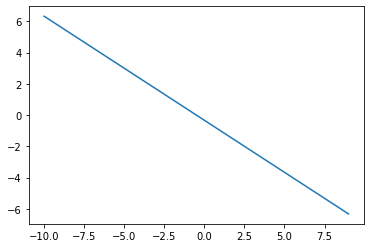

In [ ]:
x = np.arange(-10, 10, 1)
y = -(2/3)*x -1/3

plt.plot(x, y)

plt.show()

Mientras que la gráfica del hiperplano separador con $w^T=-[1,2,3]$ a:

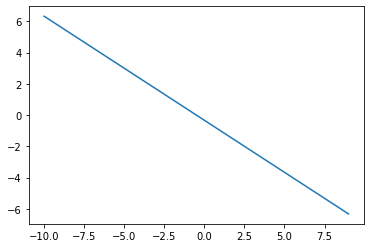

In [ ]:
x2 = np.arange(-10, 10, 1)
y2 = -(-2/-3)*x2 -(-1/-3)

plt.plot(x2, y2)

plt.show()

*Problema* 1.4

(a).

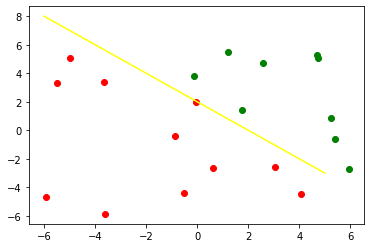

In [3]:
w=[random.randint(-6,6),random.randint(-6,6),random.randint(-6,6)]
def sign(z):
  if w[0]+w[1]*z[0]+w[2]*z[1]>=0:
    return 1
  else:
    return -1

dataSet=[]
for i in range(20):
  x=[random.uniform(-6, 6), random.uniform(-6, 6)]
  y=sign(x)
  dataSet.append([x,y])

greenX, redX, greenY, redY=[],[],[],[]
for i in dataSet:
  if i[1]==1:
    greenX.append(i[0][0])
    greenY.append(i[0][1])
  else:
    redX.append(i[0][0])
    redY.append(i[0][1])

plt.scatter(greenX,greenY, color='green')
plt.scatter(redX,redY, color='red')
tempX=np.arange(-6,6)
plt.plot(tempX,-(w[1]/w[2])*tempX-(w[0]/w[2]),color='yellow')
plt.show()

(b).

Se necesitaron  0  updates hasta converger


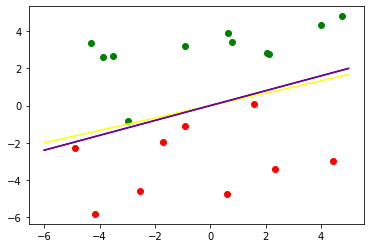

In [14]:
count=0
originalTempW=[random.randint(-6,6),random.randint(-6,6),random.randint(-6,6)]
tempW=originalTempW
def tempSign(tempWW,z):
  if tempWW[0]+tempWW[1]*z[0]+tempWW[2]*z[1]>=0:
    return 1
  else:
    return -1

outliers=[]
def outers(ww):
  tempOutliers=[]
  for i in dataSet:
    if tempSign(ww,i[0])!=i[1]:
      tempOutliers.append(i)
  return tempOutliers

outliers=outers(tempW)

while outliers:
  for i in outliers:
    temp=[x*i[1] for x in i[0]]
    temp2=[1]
    temp2.extend(temp)
    tempW=[sum(x) for x in zip(tempW,temp2)]
    count+=1
  outliers=outers(tempW)
print("Se necesitaron ",count," updates hasta converger")

plt.scatter(greenX,greenY, color='green')
plt.scatter(redX,redY, color='red')
plt.plot(tempX,-(w[1]/w[2])*tempX-(w[0]/w[2]),color='yellow')
plt.plot(tempX,-(originalTempW[1]/originalTempW[2])*tempX-(originalTempW[0]/originalTempW[2]),color='blue')
plt.plot(tempX,-(tempW[1]/tempW[2])*tempX-(tempW[0]/tempW[2]),color='purple')
plt.show()

En la anterior gráfica se pueden observar tres rectas, la amarilla es la recta que se trabajó en el punto (a)., la recta azul es la recta generada aleatoriamente, mientras que la recta morada, es la recta separadora obtenida mediante el perceptrón.

Acerca de comentar qué tan cerca están las funciones f (amarilla) y g (morada), pues la verdad pareciera que una es como la aproximación a los puntos rojos y la otra a los puntos verdes, desde que ambas separen bien el conjunto de datos.

(c).

Se necesitaron  25  updates hasta converger


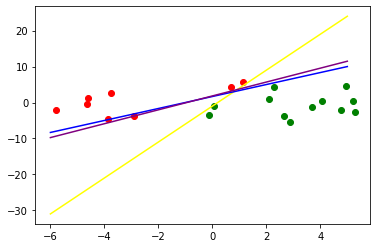

In [ ]:
w2=[random.randint(-6,6),random.randint(-6,6),random.randint(-6,6)]
def sign2(z):
  if w2[0]+w2[1]*z[0]+w2[2]*z[1]>=0:
    return 1
  else:
    return -1

dataSet2=[]
for i in range(20):
  x=[random.uniform(-6, 6), random.uniform(-6, 6)]
  y=sign2(x)
  dataSet2.append([x,y])

greenX2, redX2, greenY2, redY2=[],[],[],[]
for i in dataSet2:
  if i[1]==1:
    greenX2.append(i[0][0])
    greenY2.append(i[0][1])
  else:
    redX2.append(i[0][0])
    redY2.append(i[0][1])

count2=0
originalTempW2=[random.randint(-6,6),random.randint(-6,6),random.randint(-6,6)]
tempW2=originalTempW2

outliers2=[]
def outers2(ww):
  tempOutliers2=[]
  for i in dataSet2:
    if tempSign(ww,i[0])!=i[1]:
      tempOutliers2.append(i)
  return tempOutliers2

outliers2=outers2(tempW2)

while outliers2:
  for i in outliers2:
    tempa=[x*i[1] for x in i[0]]
    temp2a=[1]
    temp2a.extend(tempa)
    tempW2=[sum(x) for x in zip(tempW2,temp2a)]
    count2+=1
  outliers2=outers2(tempW2)
print("Se necesitaron ",count2," updates hasta converger")

plt.scatter(greenX2,greenY2, color='green')
plt.scatter(redX2,redY2, color='red')
plt.plot(tempX,-(w2[1]/w2[2])*tempX-(w2[0]/w2[2]),color='yellow')
plt.plot(tempX,-(originalTempW2[1]/originalTempW2[2])*tempX-(originalTempW2[0]/originalTempW2[2]),color='blue')
plt.plot(tempX,-(tempW2[1]/tempW2[2])*tempX-(tempW2[0]/tempW2[2]),color='purple')
plt.show()

Bastante similar a (b). pero mayor cantidad de updates.

(c).

Se necesitaron  143  updates hasta converger


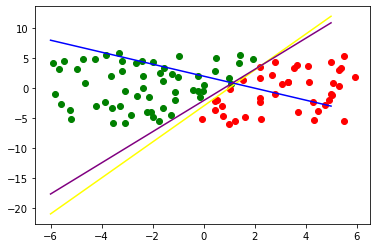

In [ ]:
w3=[random.randint(-6,6),random.randint(-6,6),random.randint(-6,6)]
def sign3(z):
  if w3[0]+w3[1]*z[0]+w3[2]*z[1]>=0:
    return 1
  else:
    return -1

dataSet2=[]
for i in range(100):
  x=[random.uniform(-6, 6), random.uniform(-6, 6)]
  y=sign3(x)
  dataSet2.append([x,y])

greenX2, redX2, greenY2, redY2=[],[],[],[]
for i in dataSet2:
  if i[1]==1:
    greenX2.append(i[0][0])
    greenY2.append(i[0][1])
  else:
    redX2.append(i[0][0])
    redY2.append(i[0][1])

count2=0
originalTempW2=[random.randint(-6,6),random.randint(-6,6),random.randint(-6,6)]
tempW2=originalTempW2

outliers2=[]
def outers2(ww):
  tempOutliers2=[]
  for i in dataSet2:
    if tempSign(ww,i[0])!=i[1]:
      tempOutliers2.append(i)
  return tempOutliers2

outliers2=outers2(tempW2)

while outliers2:
  for i in outliers2:
    tempa=[x*i[1] for x in i[0]]
    temp2a=[1]
    temp2a.extend(tempa)
    tempW2=[sum(x) for x in zip(tempW2,temp2a)]
    count2+=1
  outliers2=outers2(tempW2)
print("Se necesitaron ",count2," updates hasta converger")

plt.scatter(greenX2,greenY2, color='green')
plt.scatter(redX2,redY2, color='red')
plt.plot(tempX,-(w3[1]/w3[2])*tempX-(w3[0]/w3[2]),color='yellow')
plt.plot(tempX,-(originalTempW2[1]/originalTempW2[2])*tempX-(originalTempW2[0]/originalTempW2[2]),color='blue')
plt.plot(tempX,-(tempW2[1]/tempW2[2])*tempX-(tempW2[0]/tempW2[2]),color='purple')
plt.show()

Similar al (b). también pero aumenta más veces la cantidad de updates que la cantidad que incrementamos el conjunto.

(e).

Se necesitaron  1514  updates hasta converger


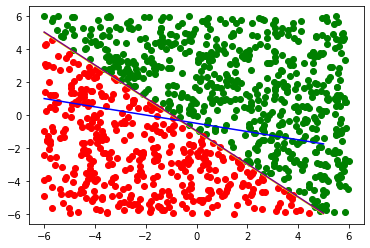

In [ ]:
w4=[random.randint(-6,6),random.randint(-6,6),random.randint(-6,6)]
def sign4(z):
  if w4[0]+w4[1]*z[0]+w4[2]*z[1]>=0:
    return 1
  else:
    return -1

dataSet3=[]
for i in range(1000):
  x=[random.uniform(-6, 6), random.uniform(-6, 6)]
  y=sign4(x)
  dataSet3.append([x,y])

greenX2, redX2, greenY2, redY2=[],[],[],[]
for i in dataSet3:
  if i[1]==1:
    greenX2.append(i[0][0])
    greenY2.append(i[0][1])
  else:
    redX2.append(i[0][0])
    redY2.append(i[0][1])

count2=0
originalTempW2=[random.randint(-6,6),random.randint(-6,6),random.randint(-6,6)]
tempW2=originalTempW2

outliers2=[]
def outers2(ww):
  tempOutliers2=[]
  for i in dataSet3:
    if tempSign(ww,i[0])!=i[1]:
      tempOutliers2.append(i)
  return tempOutliers2

outliers2=outers2(tempW2)

while outliers2:
  for i in outliers2:
    tempa=[x*i[1] for x in i[0]]
    temp2a=[1]
    temp2a.extend(tempa)
    tempW2=[sum(x) for x in zip(tempW2,temp2a)]
    count2+=1
  outliers2=outers2(tempW2)
print("Se necesitaron ",count2," updates hasta converger")

plt.scatter(greenX2,greenY2, color='green')
plt.scatter(redX2,redY2, color='red')
plt.plot(tempX,-(w4[1]/w4[2])*tempX-(w4[0]/w4[2]),color='yellow')
plt.plot(tempX,-(originalTempW2[1]/originalTempW2[2])*tempX-(originalTempW2[0]/originalTempW2[2]),color='blue')
plt.plot(tempX,-(tempW2[1]/tempW2[2])*tempX-(tempW2[0]/tempW2[2]),color='purple')
plt.show()

Nuevamente muy similar a (b). solo que se necesitaron $1.5$ veces más updates que el número de pruebas, mientras que en los dos casos que intentamos con 20, es decir en (b). y (c)., el ratio fue menor a $1$.

(f).

In [34]:
w5=[random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6)]
def sign4(z):
  if w5[0]+w5[1]*z[0]+w5[2]*z[1]+w5[3]*z[2]+w5[4]*z[3]+w5[5]*z[4]+w5[6]*z[5]+w5[7]*z[6]+w5[8]*z[7]+w5[9]*z[8]+w5[10]*z[9]>=0:
    return 1
  else:
    return -1

def tempSign(tempWW,z):
  if tempWW[0]+tempWW[1]*z[0]+tempWW[2]*z[1]+tempWW[3]*z[2]+tempWW[4]*z[3]+tempWW[5]*z[4]+tempWW[6]*z[5]+tempWW[7]*z[6]+tempWW[8]*z[7]+tempWW[9]*z[8]+tempWW[10]*z[9]>=0:
    return 1
  else:
    return -1

dataSet4=[]
for i in range(1000):
  x=[random.uniform(-6, 6), random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6)]
  y=sign4(x)
  dataSet4.append([x,y])

count2=0
originalTempW2=[random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6)]
tempW2=originalTempW2

outliers2=[]
def outers2(ww):
  tempOutliers2=[]
  for i in dataSet4:
    if tempSign(ww,i[0])!=i[1]:
      tempOutliers2.append(i)
  return tempOutliers2

outliers2=outers2(tempW2)
while outliers2:
  for i in outliers2:
    tempa=[x*i[1] for x in i[0]]
    temp2a=[1]
    temp2a.extend(tempa)
    tempW2=[sum(x) for x in zip(tempW2,temp2a)]
    count2+=1
  outliers2=outers2(tempW2)
print("Se necesitaron ",count2," updates hasta converger")


Se necesitaron  1175  updates hasta converger


(g).

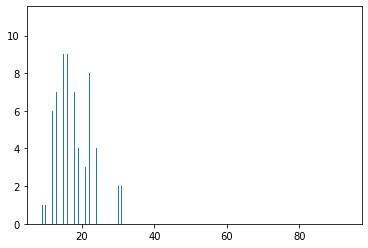

In [44]:
tests=[]
for i in range(100):
  w5=[random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6)]
  def sign4(z):
    if w5[0]+w5[1]*z[0]+w5[2]*z[1]+w5[3]*z[2]+w5[4]*z[3]+w5[5]*z[4]+w5[6]*z[5]+w5[7]*z[6]+w5[8]*z[7]+w5[9]*z[8]+w5[10]*z[9]>=0:
      return 1
    else:
      return -1

  dataSet4=[]
  for i in range(20):
    x=[random.uniform(-6, 6), random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6)]
    y=sign4(x)
    dataSet4.append([x,y])

  count2=0
  originalTempW2=[random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6)]
  tempW2=originalTempW2

  outliers2=[]
  def outers2(ww):
    tempOutliers2=[]
    for i in dataSet4:
      if tempSign(ww,i[0])!=i[1]:
        tempOutliers2.append(i)
    return tempOutliers2

  outliers2=outers2(tempW2)
  while outliers2:
    for i in range(len(outliers2)):
      z=random.choice(outliers2)
      outliers2.remove(z)
      tempA=[x*z[1] for x in z[0]]
      temp2a=[1]
      temp2a.extend(tempA)
      tempW2=[sum(x) for x in zip(tempW2,temp2a)]
      count2+=1
    outliers2=outers2(tempW2)
  tests.append(count2)
plt.hist(tests,bins=500)
plt.show()

In [ ]:
tests=[]
for i in range(100):
  w5=[random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6)]
  def sign4(z):
    if w5[0]+w5[1]*z[0]+w5[2]*z[1]+w5[3]*z[2]+w5[4]*z[3]+w5[5]*z[4]+w5[6]*z[5]+w5[7]*z[6]+w5[8]*z[7]+w5[9]*z[8]+w5[10]*z[9]>=0:
      return 1
    else:
      return -1

  dataSet4=[]
  for i in range(100):
    x=[random.uniform(-6, 6), random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6),random.uniform(-6, 6)]
    y=sign4(x)
    dataSet4.append([x,y])

  count2=0
  originalTempW2=[random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6),random.randint(-6,6)]
  tempW2=originalTempW2

  outliers2=[]
  def outers2(ww):
    tempOutliers2=[]
    for i in dataSet4:
      if tempSign(ww,i[0])!=i[1]:
        tempOutliers2.append(i)
    return tempOutliers2

  outliers2=outers2(tempW2)
  while outliers2:
    for i in range(len(outliers2)):
      z=random.choice(outliers2)
      outliers2.remove(z)
      tempA=[x*z[1] for x in z[0]]
      temp2a=[1]
      temp2a.extend(tempA)
      tempW2=[sum(x) for x in zip(tempW2,temp2a)]
      count2+=1
    outliers2=outers2(tempW2)
  tests.append(count2)
plt.hist(tests,bins=500)
plt.show()

Solo pude cargar con data sets de 20 elementos

(h).

Si aumentamos ambos, se aumentará el tiempo de ejecución, no obstante, al aumentar el $N$, se incrementará más que al incrementar el $d$.

*Problema* 1.6

(a). Como $\mu$ corresponde a la probabilidad de obtener un canica roja, luego la de no obtenerla sería $1-\mu$, como la idea es saber cuál es la probabilidad de no sacarla en los 10 intentos, terminaría siendo $(1-\mu)^{10}$. Ahora bien, podemos proceder a los casos:


*   Si el $\mu=0.05$, tenemos que la probabilidad de que $v=0$ es 0.59873693923837890625
*   Si el $\mu=0.5$, tenemos que la probabilidad de que $v=0$ es 0.0009765625
*   Si el $\mu=0.8$, tenemos que la probabilidad de que $v=0$ es 0.0000001024



(b). Obtener esta probabilidad resulta de manera más sencilla por el complemento, entonces procedemos primero a obtener cuál sería su complemento, el cual es la probabilidad de que ninguna de las muestras cumpla que $v=0$. Como la probabilidad de que para una muestra específica se tenga $v=0$ es $(1-\mu)^{10}$, como fue visto en el punto anterior, entonces sabemos que la probabilidad de que no cumpla que $v=0$ sería de $1-(1-\mu)^{10}$; para los 1000 muestreos la probabilidad entonces sería de $[1-(1-\mu)^{10}]^{1000}$.

La anterior probabilidad es realmente el complemento de la que nos están preguntando, de esta manera, podemos concluir, que la probabilidad de que por lo menos una de los muestreos cumpla que $v=0$ es de $1-[1-(1-\mu)^{10}]^{1000}$. Sustituyendo ahora por los valores dados, vemos que 

*   Si el $\mu=0.05$, la probabilidad de que por lo menos una muestra tenga el $v=0$ es 1
*   Si el $\mu=0.5$, la probabilidad de que por lo menos una muestra tenga el $v=0$ es 0.623576
*   Si el $\mu=0.8$, la probabilidad de que por lo menos una muestra tenga el $v=0$ es 0.000102395



(c). La probabilidad de este caso sería cambiar la que encontramos en (b). por $1-[1-(1-\mu)^{10}]^{1000000}$. Sustituyendo:

*   Si el $\mu=0.05$, la probabilidad de que por lo menos una muestra tenga el $v=0$ es 1
*   Si el $\mu=0.5$, la probabilidad de que por lo menos una muestra tenga el $v=0$ es 1
*   Si el $\mu=0.8$, la probabilidad de que por lo menos una muestra tenga el $v=0$ es 0.0973316

*Problema* 1.9

*Problema* 1.12

(a). Si derivamos $E_{in}(h)$ con respecto a $h$, obtenemos $E_{in}'(h)=\sum_{n=1}^N2(h-y_n)$, igualándola a 0, si despejamos $h$, tenemos que \begin{align*} 0&=\sum_{n=1}^N2(h-y_n)\\ 0&=\sum_{n=1}^N(h-y_n)\\
Nh&=\sum_{n=1}^Ny_n\\ h&=\frac{1}{N}\sum_{n=1}^Ny_n. \end{align*} Donde en este despeje de $h$ se le puede entender como la media de $h$ o $h_{media}$.

(b). Al derivar $E_{in}(h)$ con respecto a $h$, llegamos a $E_{in}'(h)=\sum_{n=1}^N sign(h-y_n)$. Dada la definición de la mediana $h_{mediana}$, se cumple que la derivada sea cero, minimizando el error dentro de la muestra.

(c). Nuestra $h_{media}$ se incrementará bastante pues es claro que depende del valor de $y_n$, mientras que la $h_{mediana}$ puede seguir tal cual pues lo único que nos interesa es que se cumpla la desigualdad $h_{mediana}<y_n$.